# About the Dataset 

This dataset is obtained from [tradytics.com](https://tradytics.com/trady-flow) on 21st June 2022. By the time you get to see the code, this dataset will no longer will be available on the website. You can only access it on my [Github](https://github.com/muhammadanas365/Data-Science-Projects---EDA/blob/main/6.%20Tradyflow%20-%20Analysis/Trady%20Flow%20-%20Best%20Options%20Trade%20Ideas.csv).


# What is the Dataset?
This dataset, is the flow of the stock market on the date 17th June 2022. It contains many tickers. An excellent dataset to practice time series and test your data science skills.

# What Do the rows Stand For?
1. **Time** - Time when this ticker was caught in flow.

2. **Sym** - The ticker symbol, e.g AAPL, TSLA, SPY.

3. **C/P** - ***Call*** or ***Put*** trade?

4. **Exp** - The expirtation of the contract.

5. **Str** - The strike price.

6. **Spot** - The stock price at the moment when the flow was reported.

7. **Bidask** - The bidask of the contract

8. **Orders** - The total order of the contract.

9. **Volume** - The number of shares traded at the moment when this contract was caught.

10. **Premiums** - The total money spent on this contract.

11. **Open Interest** - The total number of opened contracts at the moment when this contract was caught.

12. **Diff %** - The % difference between Spot and Strike price.

13. **ITM** - If the contract was a win or loss.

In [401]:
# Import all needed libaries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve 

print("All Modules Initialized 🚀")

# Importing the data
URL = "https://raw.githubusercontent.com/muhammadanas365/Data-Science-Projects---EDA/main/6.%20Tradyflow%20-%20Analysis/Trady%20Flow%20-%20Best%20Options%20Trade%20Ideas.csv"
tradyflow = pd.read_csv(URL)

print("Data Imported Successfully 🚀")

All Modules Initialized 🚀
Data Imported Successfully 🚀


In [402]:
# First 5 rows of data
tradyflow.head(5)

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0


In [403]:
# Last 5 rows of data
tradyflow.tail(5)

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
7822,6/7/2021 11:41,INTC,Call,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,Call,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,Put,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,Put,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1
7826,6/7/2021 9:48,SPR,Call,12/17/2021,55.0,50.94,5.40,6,406,219.40K,4.15K,8.08,0


In [404]:
# Get some description of the data
tradyflow.describe()

,Strike,Spot,BidAsk,Orders,Diff(%),ITM
count,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000
mean,151.178342,148.595490,4.220649,7.109493,11.477625,0.679826
std,358.668235,353.566766,5.207856,5.312003,19.367772,0.466573
min,1.500000,1.230000,0.110000,5.000000,0.020000,0.000000
25%,30.000000,28.270000,1.650000,5.000000,2.110000,0.000000
50%,60.000000,58.950000,3.100000,5.000000,5.600000,1.000000
75%,145.000000,145.160000,5.120000,7.000000,12.715000,1.000000
max,3950.000000,3755.250000,194.350000,124.000000,277.640000,1.000000


In [405]:
# Get some information of the data
tradyflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7827 entries, 0 to 7826
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     7827 non-null   object 
 1   Sym      7827 non-null   object 
 2   C/P      7827 non-null   object 
 3   Exp      7827 non-null   object 
 4   Strike   7827 non-null   float64
 5   Spot     7827 non-null   float64
 6   BidAsk   7827 non-null   float64
 7   Orders   7827 non-null   int64  
 8   Vol      7827 non-null   object 
 9   Prems    7827 non-null   object 
 10  OI       7827 non-null   object 
 11  Diff(%)  7827 non-null   float64
 12  ITM      7827 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 795.1+ KB


In [406]:
# Check for null values in all columns of dataset
pd.DataFrame(tradyflow.isnull().sum())

,0
Time,0
Sym,0
C/P,0
Exp,0
Strike,0
Spot,0
BidAsk,0
Orders,0
Vol,0
Prems,0


In [407]:
# Make the needed groups
ticker_group = tradyflow.groupby(["Sym"])
call_put_group = tradyflow.groupby(["C/P"])
orders_group = tradyflow.groupby(["Orders"])

print("Groups Created Successfully 🚀")

Groups Created Successfully 🚀


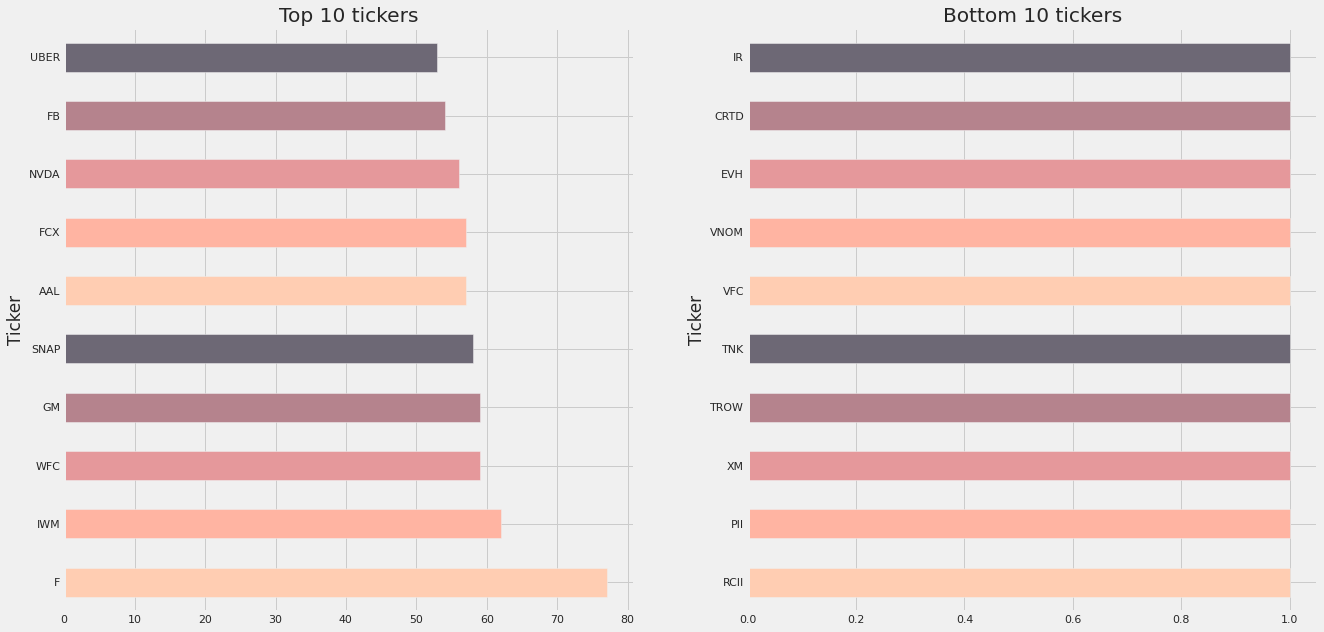

In [408]:
# Get the top 10 stock tickers

# Set theme and settings
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

# Plot it
plt.subplot(1, 2, 1)
tradyflow["Sym"].value_counts(ascending=True).nlargest(10).plot.barh(color=["#ffcdb2", "#ffb4a2", "#e5989b", "#b5838d", "#6d6875"])
plt.title("Top 10 tickers")
plt.ylabel("Ticker")


plt.subplot(1, 2, 2)
tradyflow["Sym"].value_counts(ascending=True).nsmallest(10).plot.barh(color=["#ffcdb2", "#ffb4a2", "#e5989b", "#b5838d", "#6d6875"])
plt.title("Bottom 10 tickers")
plt.ylabel("Ticker")


# Save and Show the Figure
plt.savefig('top_10_tickers')
plt.show()

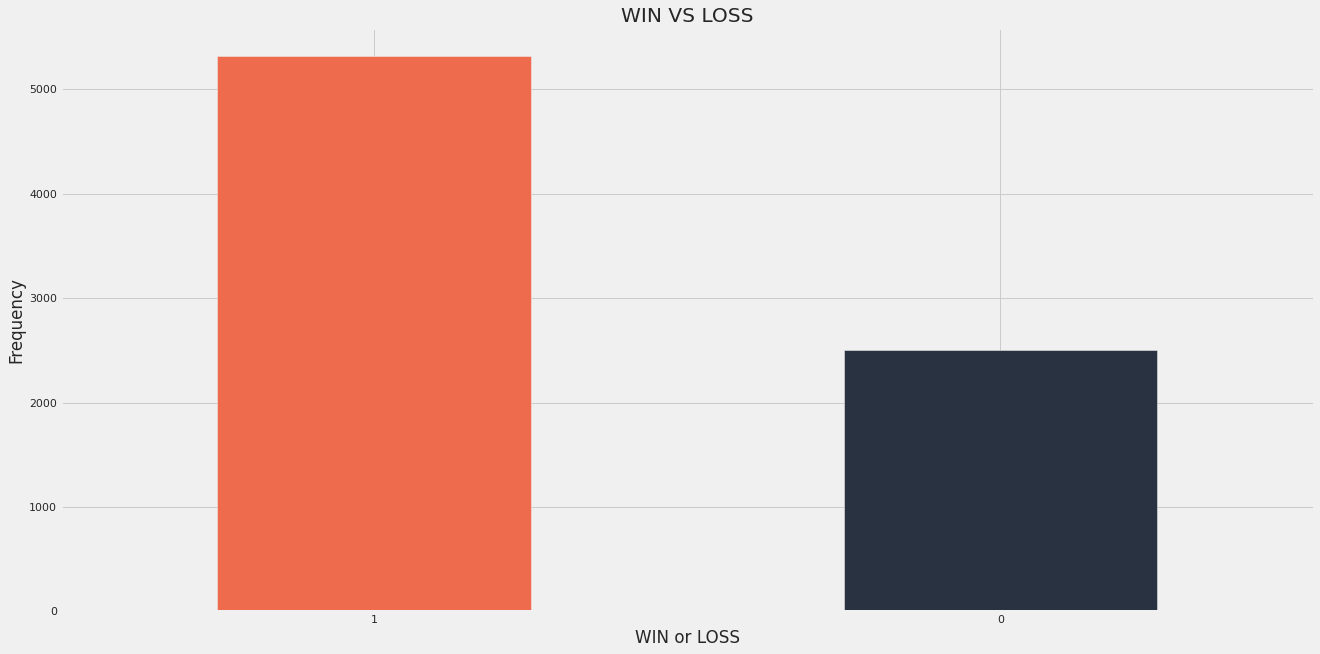

In [409]:
# WIN VS LOSS

# Set theme and settings
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

# Plot it
tradyflow["ITM"].value_counts().plot.bar(color=["#ee6c4d", "#293241"])

# Description
plt.title("WIN VS LOSS")
plt.xlabel("WIN or LOSS")
plt.ylabel("Frequency")
plt.xticks(rotation=360)

# Save and Show the Figure
plt.savefig('win_vs_loss')
plt.show()

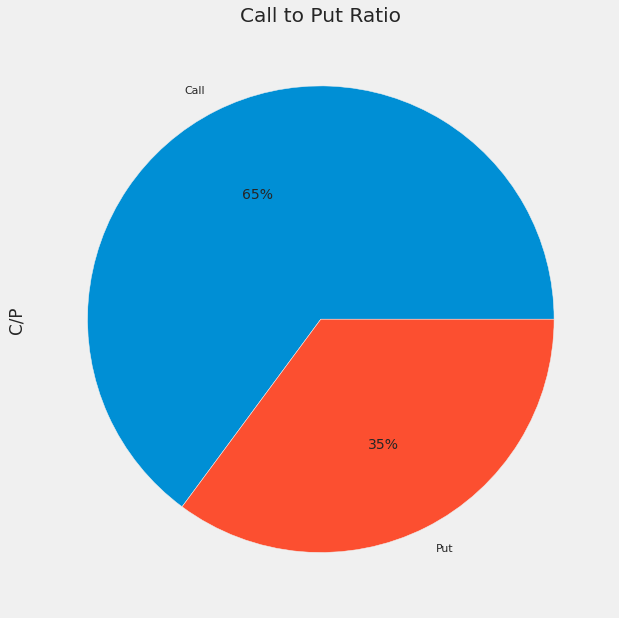

In [410]:
# Call/Put Ratio
plt.title('Call to Put Ratio')
tradyflow['C/P'].value_counts().plot.pie(autopct='%1.0f%%',figsize=(15,10))
plt.show()

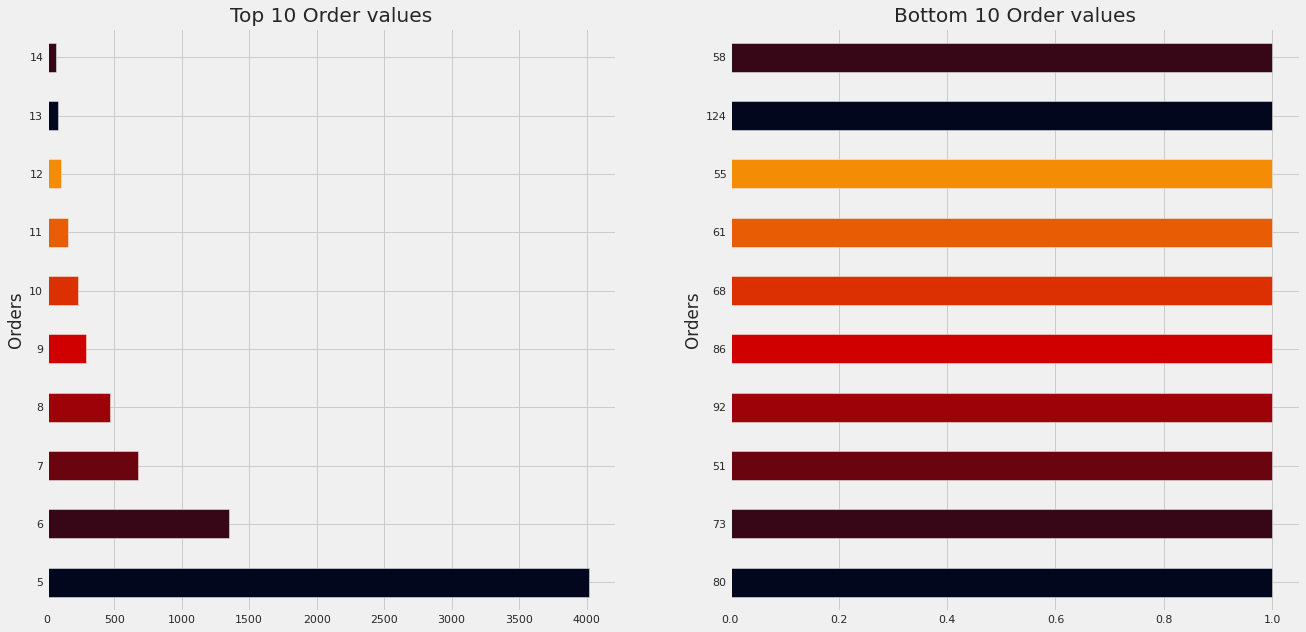

In [411]:
# Get the top and bottom 10 Order numbers

# Set theme and settings
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

# Plot it
plt.subplot(1, 2, 1)
tradyflow["Orders"].value_counts().nlargest(10).plot.barh(color=["#03071e", "#370617", "#6a040f", "#9d0208", "#d00000", "#dc2f02", "#e85d04", "#f48c06"])
plt.title("Top 10 Order values")
plt.ylabel("Orders")

plt.subplot(1, 2, 2)
tradyflow["Orders"].value_counts().nsmallest(10).plot.barh(color=["#03071e", "#370617", "#6a040f", "#9d0208", "#d00000", "#dc2f02", "#e85d04", "#f48c06"])
plt.title("Bottom 10 Order values")
plt.ylabel("Orders")


# Save and Show the Figure
plt.savefig('top_10_orders')
plt.show()

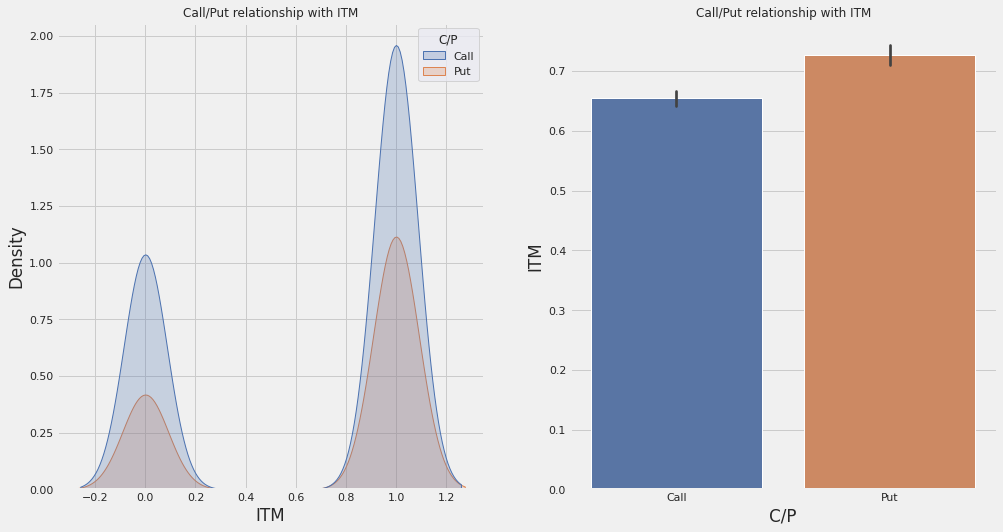

In [412]:
# Call/Put relationship with ITM
fig, axes = plt.subplots(1, 2)

# Set seaborn plotting size
sns.set(rc = {'figure.figsize':(15,8)})

# Plot The Graphs
sns.kdeplot(data=tradyflow, x='ITM', hue='C/P', shade=True, ax=axes[0]).set_title("Call/Put relationship with ITM")
sns.barplot(data=tradyflow, x="C/P", y="ITM", ax=axes[1]).set_title("Call/Put relationship with ITM")

# Save and Show the Figure
plt.savefig('call_put_relationship')
plt.show()

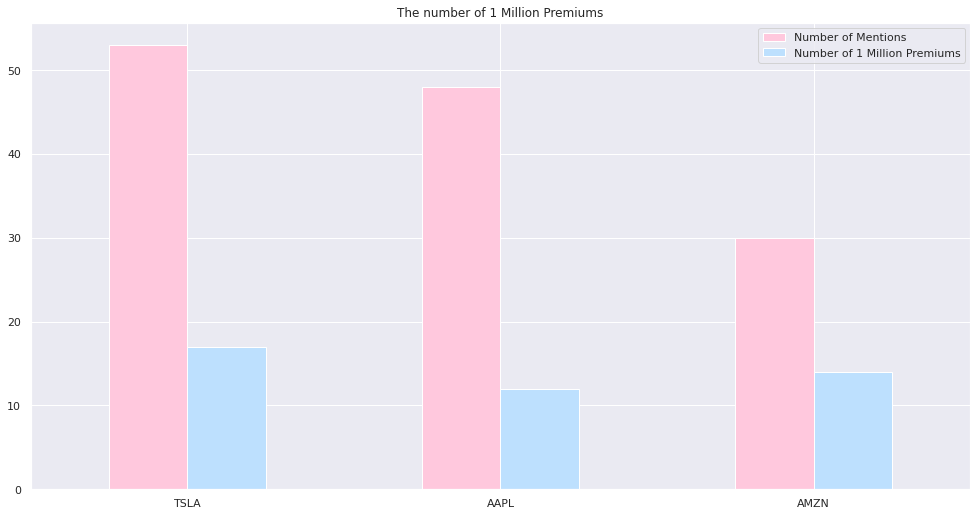

In [413]:
# Get the tickers with 1M+ premiums
tickers = tradyflow["Sym"].value_counts()
stock_with_one_million_plus_premiums = ticker_group['Prems'].apply(lambda x: x.str.contains('M').sum())


# Create the seprate column for the filtered data
one_million_tickers_df = pd.concat([(tickers), (stock_with_one_million_plus_premiums)], axis='columns', sort=False)

# Change the column names so they can make more sense
one_million_tickers_df.rename(columns={'Prems': 'Number of 1 Million Premiums', "Sym" : "Number of Mentions"},
          inplace=True, errors='raise')

# Ask the users regarding which tickers they wish to see 

# tickers_inputted_by_user = input('Enter the stock tickers you wish to view (separate ): ')
# tickers_inputted_by_user = tickers_inputted_by_user.split()

tickers_inputted_by_user = ["TSLA", "AAPL", "AMZN"]

# Ask the users is they want to see 100k+ or 

# Get the function call
# Get them in a function
def find_1_million_premiums_stocks(ticker_names):
    return pd.DataFrame(one_million_tickers_df.loc[ticker_names]).plot.bar(color=["#ffc8dd", "#bde0fe"])

find_1_million_premiums_stocks(tickers_inputted_by_user)
plt.xticks(rotation=360)
plt.title(f"The number of 1 Million Premiums")
plt.show()

In [414]:
# Coverting (K) and (M) into Thousand and Millions
tradyflow['Vol'] = tradyflow['Vol'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
tradyflow['Prems'] = tradyflow['Prems'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
tradyflow['OI'] = tradyflow['OI'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

print("Successfully Converted 🚀(*/ω＼*)")

Successfully Converted 🚀(*/ω＼*)


# ⬇️ FILTER SYSTEM BELOW - UNDER CONSTRUCTION ⬇️

In [460]:
tickers_inputted_by_user = ["TSLA", "AMZN"]
filtered_stocks  = (tradyflow["Prems"] > 1000000) & (tradyflow["Sym"].isin(tickers_inputted_by_user))

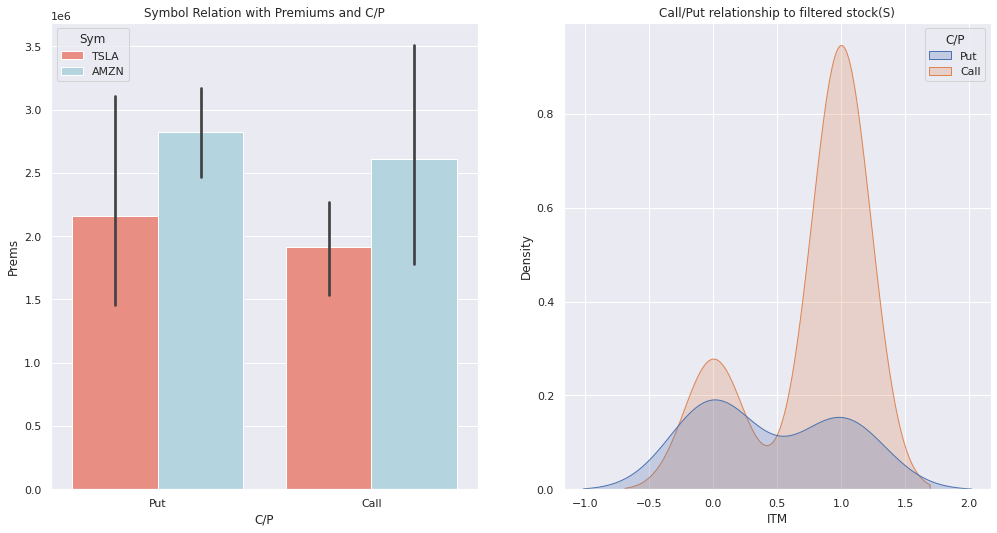

In [461]:
# Set Style
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize':(15,8)})

# Plot filtered data
pd.DataFrame(tradyflow.loc[filtered_stocks]) # PRINT THIS ON SEPARATE LINE TO SEE TABUALAR FORM OF FILTERED DATA
sns.barplot(data=tradyflow.loc[filtered_stocks], x="C/P", y="Prems", hue="Sym", 
            palette=sns.color_palette(['salmon', 'lightblue']), ax=axes[0]).set_title("Symbol Relation with Premiums and C/P")
sns.kdeplot(data=tradyflow.loc[filtered_stocks], x='ITM', hue='C/P', shade=True, ax=axes[1]).set_title("Call/Put relationship to filtered stock(S)")

# Description
plt.show()